In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestRegressor
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import scipy

In [226]:
data = pd.read_csv(r"C:\Users\86151\Downloads\cs-training.csv\cs-training.csv")

In [227]:
data = data.iloc[:,1:]

In [228]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [229]:
data.shape

(150000, 11)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [231]:
data.drop_duplicates(inplace=True)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [233]:
data.index = range(data.shape[0]) #reset index after delete rows

In [234]:
data.isnull().mean() #proportion of missing value for each feature

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [235]:
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)

In [236]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [237]:
# fill missing income with random forest
def fill_missing_rf(x,y,to_fill):
    df = x.copy()
    fill = df.iloc[:,df.columns == to_fill]
    df = pd.concat([df.iloc[:,df.columns != to_fill], pd.DataFrame(y)], axis = 1)
    
    ytrain = fill[fill.notnull().all(axis=1)]
    ytest = fill[fill.isnull().any(axis=1)]
    xtrain = df.iloc[ytrain.index,:]
    xtest = df.iloc[ytest.index,:]
    
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100)
    rf = rf.fit(xtrain,ytrain)
    ypredict = rf.predict(xtest)
    
    return ypredict
    

In [238]:
x = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [239]:
x.shape

(149391, 10)

In [240]:
x

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149386,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149387,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149388,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149389,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [241]:
y

0         1
1         0
2         0
3         0
4         0
         ..
149386    0
149387    0
149388    0
149389    0
149390    0
Name: SeriousDlqin2yrs, Length: 149391, dtype: int64

In [242]:
y_pred = fill_missing_rf(x,y,'MonthlyIncome')

C:\Users\86151\AppData\Local\Temp\ipykernel_51056\119356192.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(xtrain,ytrain)


In [243]:
y_pred

array([0.2 , 0.33, 0.14, ..., 0.14, 0.09, 0.  ])

In [244]:
ypredict.shape

(29221,)

In [245]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'] = y_pred

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [247]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5428.144435,13228.501714,0.0,0.0,0.190000,1800.000000,4431.000000,7417.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [248]:
data = data[data['age'] != 0] #age cant be 0

In [249]:
data[data.loc[:,'NumberOfTimes90DaysLate']>90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.0,1479.070385,0,98,0,98,0.000000
3883,0,1.0,38,98,12.0,2980.120000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2484.365333,0,98,0,98,0.759863
147180,1,1.0,68,98,255.0,4.180000,0,98,0,98,0.000000
148548,1,1.0,24,98,54.0,661.360000,0,98,0,98,0.000000
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.000000


In [250]:
data[data.loc[:,'NumberOfTimes90DaysLate']>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [251]:
data.loc[:,'NumberOfTimes90DaysLate'].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [252]:
data = data[data.loc[:,'NumberOfTimes90DaysLate']<90]

In [253]:
data.index = range(data.shape[0])

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [255]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [256]:
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [257]:
n_sample_ = x.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

In [258]:
n_1_sample/x.shape[0]

0.06618844903295008

In [259]:
n_0_sample/x.shape[0] #93% are 0

0.9338115509670499

In [260]:
#deal with data imbalance
sm = SMOTE(random_state=1)
x,y = sm.fit_resample(x,y)

In [261]:
n_sample = x.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

In [262]:
x.shape

(278584, 10)

In [263]:
y

0         1
1         0
2         0
3         0
4         0
         ..
278579    1
278580    1
278581    1
278582    1
278583    1
Name: SeriousDlqin2yrs, Length: 278584, dtype: int64

In [264]:
n_1_sample/x.shape[0]

0.5

In [265]:
n_0_sample/x.shape[0]

0.5

In [266]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [267]:
xtrain,xvali,ytrain,yvali = train_test_split(x,y,test_size=0.3,random_state=42)

In [268]:
model_data = pd.concat([ytrain,xtrain],axis=1)

In [269]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
228626,1,0.287751,39,0,0.548950,6882.102709,9,0,1,0,1.715892
77755,0,0.067156,59,0,0.377116,9744.000000,25,0,2,0,0.000000
141145,0,0.030254,51,0,0.615891,3800.000000,16,0,2,0,0.000000
171258,1,0.765109,53,1,0.551583,11000.000000,16,0,1,0,1.501489
126241,0,0.025159,40,0,0.178416,13333.000000,6,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0.000000,45,0,915.000000,0.140000,3,0,0,0,2.000000
259178,1,0.173382,56,1,110.646947,0.563740,3,0,0,0,0.000000
131932,0,0.004084,62,0,0.007328,1500.000000,6,0,0,0,0.000000
146867,0,0.358643,31,0,0.607797,3000.000000,9,0,1,0,1.000000


In [110]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [225]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,1,0.287751,39,0,0.548950,6882.102709,9,0,1,0,1.715892,"(36.0, 39.0]"
1,0,0.067156,59,0,0.377116,9744.000000,25,0,2,0,0.000000,"(56.0, 59.0]"
2,0,0.030254,51,0,0.615891,3800.000000,16,0,2,0,0.000000,"(50.0, 52.0]"
3,1,0.765109,53,1,0.551583,11000.000000,16,0,1,0,1.501489,"(52.0, 54.0]"
4,0,0.025159,40,0,0.178416,13333.000000,6,0,1,0,0.000000,"(39.0, 41.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
195003,0,0.000000,45,0,915.000000,0.110000,3,0,0,0,2.000000,"(43.0, 45.0]"
195004,1,0.542991,49,0,119.274808,0.437271,5,0,0,0,0.000000,"(48.0, 50.0]"
195005,0,0.004084,62,0,0.007328,1500.000000,6,0,0,0,0.000000,"(61.0, 64.0]"
195006,0,0.358643,31,0,0.607797,3000.000000,9,0,1,0,1.000000,"(28.0, 31.0]"


In [112]:
vali_data = pd.concat([yvali,xvali],axis=1)

In [113]:
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [114]:
vali_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.855474,35,0,0.775964,2075.018954,8,0,0,0,1.992418
1,1,0.437291,61,0,0.769177,6573.353302,17,0,1,0,1.432547
2,1,1.000000,39,0,0.597820,3298.020120,1,0,1,0,2.030180
3,1,0.572001,60,0,0.133249,3238.198848,3,0,0,0,0.000000
4,0,0.109052,42,0,1.235082,3334.000000,14,0,2,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
83571,0,0.033296,51,0,3267.000000,0.020000,4,0,1,0,0.759863
83572,0,0.797239,40,0,1.073785,5000.000000,13,0,2,0,2.000000
83573,0,0.276265,72,0,0.332223,1200.000000,5,0,0,0,0.000000
83574,1,1.131822,50,2,0.253941,8700.000000,7,1,1,2,0.758519


In [116]:
model_data.to_csv(r'C:\Users\86151\Downloads\kaggle_credit_train_data.csv')

In [117]:
vali_data.to_csv(r'C:\Users\86151\Downloads\kaggle_credit_vali_data.csv')

In [285]:
model_data = pd.read_csv(r'C:\Users\86151\Downloads\kaggle_credit_train_data.csv')

In [272]:
model_data['age']

0         39
1         59
2         51
3         53
4         40
          ..
195003    45
195004    49
195005    62
195006    31
195007    73
Name: age, Length: 195008, dtype: int64

In [168]:
model_data['qcut'], updown = pd.qcut(model_data['age'],retbins = True, q=20)

In [169]:
model_data['qcut'] #which bin is each age in

0         (36.0, 39.0]
1         (56.0, 59.0]
2         (50.0, 52.0]
3         (52.0, 54.0]
4         (39.0, 41.0]
              ...     
195003    (43.0, 45.0]
195004    (48.0, 50.0]
195005    (61.0, 64.0]
195006    (28.0, 31.0]
195007    (68.0, 74.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64, right]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 109.0]]

In [170]:
updown #low and high of 20 bins

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  59.,  61.,  64.,  68.,  74., 109.])

In [171]:
ct_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by = 'qcut').count()['SeriousDlqin2yrs']
ct_y0

qcut
(20.999, 28.0]    4226
(28.0, 31.0]      3558
(31.0, 34.0]      4056
(34.0, 36.0]      2824
(36.0, 39.0]      5126
(39.0, 41.0]      3935
(41.0, 43.0]      4044
(43.0, 45.0]      4407
(45.0, 47.0]      4757
(47.0, 48.0]      2487
(48.0, 50.0]      4933
(50.0, 52.0]      4732
(52.0, 54.0]      4697
(54.0, 56.0]      4660
(56.0, 59.0]      6681
(59.0, 61.0]      4576
(61.0, 64.0]      7005
(64.0, 68.0]      6644
(68.0, 74.0]      6766
(74.0, 109.0]     7754
Name: SeriousDlqin2yrs, dtype: int64

In [172]:
ct_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by = 'qcut').count()['SeriousDlqin2yrs']
ct_y1

qcut
(20.999, 28.0]    7354
(28.0, 31.0]      5970
(31.0, 34.0]      6876
(34.0, 36.0]      4562
(36.0, 39.0]      7522
(39.0, 41.0]      5821
(41.0, 43.0]      5551
(43.0, 45.0]      5795
(45.0, 47.0]      6406
(47.0, 48.0]      3174
(48.0, 50.0]      6158
(50.0, 52.0]      5681
(52.0, 54.0]      4904
(54.0, 56.0]      4097
(56.0, 59.0]      5212
(59.0, 61.0]      3145
(61.0, 64.0]      3291
(64.0, 68.0]      2270
(68.0, 74.0]      1951
(74.0, 109.0]     1400
Name: SeriousDlqin2yrs, dtype: int64

In [193]:
num_bins = [*zip(updown,updown[1:],ct_y0,ct_y1)]
num_bins

[(21.0, 28.0, 4226, 7354),
 (28.0, 31.0, 3558, 5970),
 (31.0, 34.0, 4056, 6876),
 (34.0, 36.0, 2824, 4562),
 (36.0, 39.0, 5126, 7522),
 (39.0, 41.0, 3935, 5821),
 (41.0, 43.0, 4044, 5551),
 (43.0, 45.0, 4407, 5795),
 (45.0, 47.0, 4757, 6406),
 (47.0, 48.0, 2487, 3174),
 (48.0, 50.0, 4933, 6158),
 (50.0, 52.0, 4732, 5681),
 (52.0, 54.0, 4697, 4904),
 (54.0, 56.0, 4660, 4097),
 (56.0, 59.0, 6681, 5212),
 (59.0, 61.0, 4576, 3145),
 (61.0, 64.0, 7005, 3291),
 (64.0, 68.0, 6644, 2270),
 (68.0, 74.0, 6766, 1951),
 (74.0, 109.0, 7754, 1400)]

In [174]:
#make sure every bins have both 0 and 1
for i in range(20):
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
        num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
        break
    else:
        break
        

IndentationError: expected an indented block after 'if' statement on line 7 (1970304478.py, line 8)

In [194]:
def get_woe(num_bins):
    columns = ['min','max','ct_0','ct_1']
    df = pd.DataFrame(num_bins, columns = columns)
    df['total'] = df.ct_0 + df.ct_1
    df['perc'] = df.total/df.total.sum()
    df['bad_rate'] = df.ct_1/df.total
    df['good_p'] = df.ct_0/df.ct_0.sum()
    df['bad_p'] = df.ct_1/df.ct_1.sum()
    df['woe'] = np.log(df['good_p']/df['bad_p'])
    return df

In [195]:
df0 = get_woe(num_bins)
df0

,min,max,ct_0,ct_1,total,perc,bad_rate,good_p,bad_p,woe
0,21.0,28.0,4226,7354,11580,0.059382,0.635060,0.043181,0.075705,-0.561455
1,28.0,31.0,3558,5970,9528,0.048860,0.626574,0.036355,0.061458,-0.525015
2,31.0,34.0,4056,6876,10932,0.056059,0.628979,0.041444,0.070784,-0.535306
3,34.0,36.0,2824,4562,7386,0.037875,0.617655,0.028855,0.046963,-0.487073
4,36.0,39.0,5126,7522,12648,0.064859,0.594719,0.052377,0.077435,-0.390973
5,39.0,41.0,3935,5821,9756,0.050029,0.596658,0.040207,0.059924,-0.399028
6,41.0,43.0,4044,5551,9595,0.049203,0.578530,0.041321,0.057144,-0.324210
7,43.0,45.0,4407,5795,10202,0.052316,0.568026,0.045030,0.059656,-0.281268
8,45.0,47.0,4757,6406,11163,0.057244,0.573860,0.048606,0.065946,-0.305084
9,47.0,48.0,2487,3174,5661,0.029030,0.560678,0.025412,0.032674,-0.251382


In [196]:
def get_iv(df):
    rate = df.good_p - df.bad_p
    iv = np.sum(rate * df.woe)
    return iv

In [197]:
get_iv(df0)

0.3512564298862408

In [207]:
num_bins_ = num_bins.copy()
len(num_bins_)

20

In [199]:
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]

In [200]:
x1,x2

((4226, 7354), (3558, 5970))

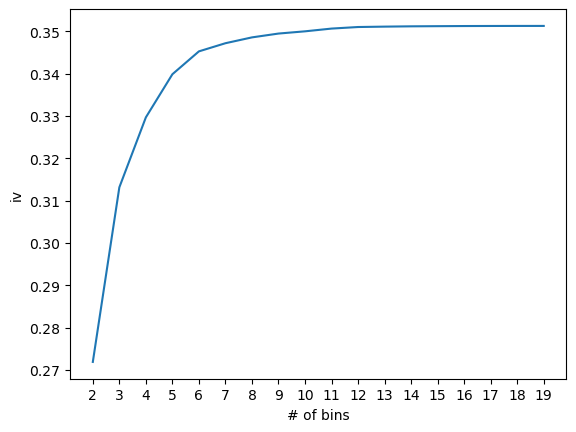

In [201]:
# get graph of #of bins vs iv value
axisx = []
iv = []
while len(num_bins_) > 2:
    pvs = []
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    iv.append(get_iv(bins_df))
plt.figure()
plt.plot(axisx,iv)
plt.xticks(axisx)
plt.xlabel('# of bins')
plt.ylabel('iv')
plt.show()

In [204]:
def get_n_bins(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [208]:
afterbins = get_n_bins(num_bins_,6)

In [209]:
afterbins

[(21.0, 41.0, 23725, 38105),
 (41.0, 54.0, 30057, 37669),
 (54.0, 61.0, 15917, 12454),
 (61.0, 64.0, 7005, 3291),
 (64.0, 74.0, 13410, 4221),
 (74.0, 109.0, 7754, 1400)]

In [210]:
bins_df = get_woe(afterbins)
bins_df

,min,max,ct_0,ct_1,total,perc,bad_rate,good_p,bad_p,woe
0,21.0,41.0,23725,38105,61830,0.317064,0.616287,0.242418,0.392269,-0.481283
1,41.0,54.0,30057,37669,67726,0.347299,0.556197,0.307118,0.387781,-0.233208
2,54.0,61.0,15917,12454,28371,0.145486,0.438969,0.162637,0.128207,0.237879
3,61.0,64.0,7005,3291,10296,0.052798,0.319639,0.071576,0.033879,0.747966
4,64.0,74.0,13410,4221,17631,0.090412,0.239408,0.137021,0.043453,1.148462
5,74.0,109.0,7754,1400,9154,0.046942,0.152939,0.079229,0.014412,1.704270


In [291]:
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    DF = DF[[X,Y]].copy()
    DF['qcut'], bins = pd.qcut(DF[X],retbins = True, q=q,duplicates = 'drop')
    ct_y0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
    ct_y1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]
    num_bins = [*zip(bins,bins[1:],ct_y0,ct_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
            break
        else:
            break
        
    def get_woe(num_bins):
        columns = ['min','max','ct_0','ct_1']
        df = pd.DataFrame(num_bins, columns = columns)
        df['total'] = df.ct_0 + df.ct_1
        df['perc'] = df.total/df.total.sum()
        df['bad_rate'] = df.ct_1/df.total
        df['good_p'] = df.ct_0/df.ct_0.sum()
        df['bad_p'] = df.ct_1/df.ct_1.sum()
        df['woe'] = np.log(df['good_p']/df['bad_p'])
        return df
    
    def get_iv(df):
        rate = df.good_p - df.bad_p
        iv = np.sum(rate * df.woe)
        return iv
    
    axisx = []
    iv = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0],num_bins[i+1][1],num_bins[i][2]+num_bins[i+1][2],num_bins[i][3]+num_bins[i+1][3])]

        bins_df0 = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        iv.append(get_iv(bins_df0))
        
    if graph:
        plt.figure()
        plt.plot(axisx,iv)
        plt.xticks(axisx)
        plt.show()
    return bins_df0

In [286]:
model_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [288]:
model_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.287751,39,0,0.548950,6882.102709,9,0,1,0,1.715892
1,1,0,0.067156,59,0,0.377116,9744.000000,25,0,2,0,0.000000
2,2,0,0.030254,51,0,0.615891,3800.000000,16,0,2,0,0.000000
3,3,1,0.765109,53,1,0.551583,11000.000000,16,0,1,0,1.501489
4,4,0,0.025159,40,0,0.178416,13333.000000,6,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
195003,195003,0,0.000000,45,0,915.000000,0.110000,3,0,0,0,2.000000
195004,195004,1,0.542991,49,0,119.274808,0.437271,5,0,0,0,0.000000
195005,195005,0,0.004084,62,0,0.007328,1500.000000,6,0,0,0,0.000000
195006,195006,0,0.358643,31,0,0.607797,3000.000000,9,0,1,0,1.000000


In [289]:
model_data = model_data.iloc[:,1:]
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


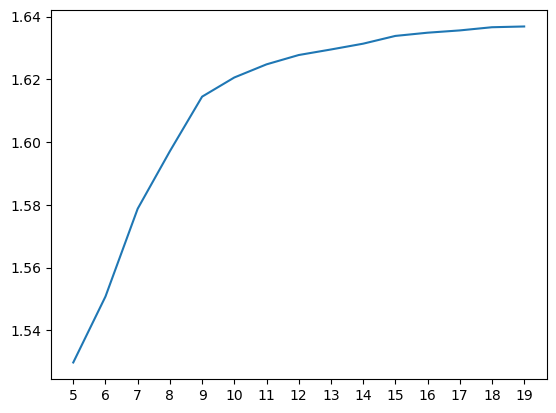

age


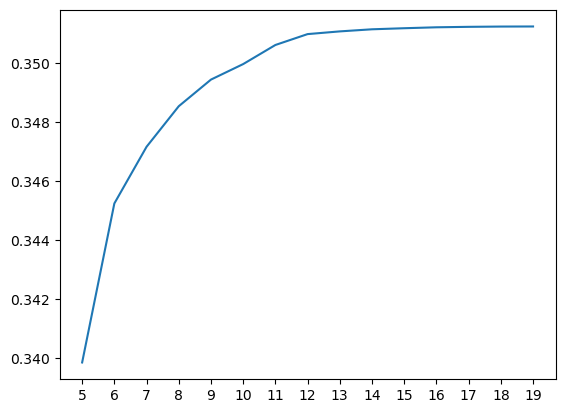

NumberOfTime30-59DaysPastDueNotWorse


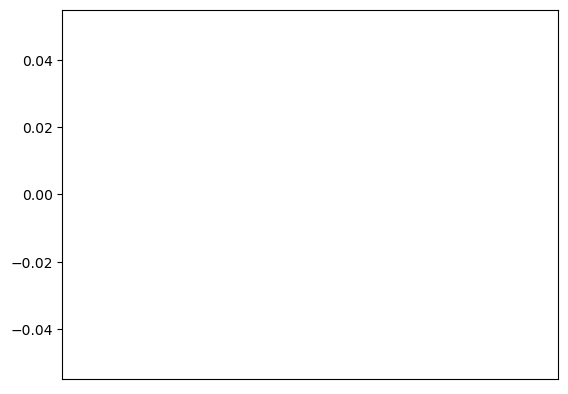

UnboundLocalError: local variable 'bins_df0' referenced before assignment

In [292]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=5,q=20,graph=True)